In [1]:
# Import data

In [2]:
import torch

In [3]:
use_cuda = False # GPU seems to raise erros on my side

device = torch.device('cuda' if use_cuda and torch.cuda.is_available() else 'cpu')

In [4]:
print(device)

cpu


In [5]:
from data_utils import get_mnist, build_data_loaders
train_dataset, test_dataset = get_mnist(normalize=True)
train_dataset.data.mean(0).mean().item(), test_dataset.data.mean(0).mean().item()


(-7.328089801639237e-10, 0.002495675580576062)

In [6]:
# Tuning Hyperparameters

In [7]:
from ray import tune
from adam import AdamOptimizer
import pandas
from adam_run import adam_run, adam_tune, adam_build

ModuleNotFoundError: No module named 'ray'

In [15]:
space = {
            "lr": tune.loguniform(1e-4, 1e-1),
            "beta1": tune.loguniform(0.1,0.9),
            "beta2": tune.loguniform(0.5, 0.999)
            "weight_decay": tune.loguniform(0.0, 5e-4)
            "epsilon": tune.loguniform(1e-10, 1e-8)
            "batch_size": tune.randint(2, 128)
        }

In [7]:
df_tuning, best_config = adam_tune(train_dataset, test_dataset, space, device)

2021-05-17 13:38:35,902	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:8265
2021-05-17 13:38:37,901	WARNING function_runner.py:544 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2021-05-17 13:38:37,926	WARNING tune.py:494 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,b_size,epochs,lr
minibatch_build_6baae_00000,PENDING,,8,5,0.0465114


(pid=43967) 2021-05-17 13:38:39,218	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=43967) Traceback (most recent call last):
(pid=43967)   File "/home/mfranke/.local/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=43967)     self._entrypoint()
(pid=43967)   File "/home/mfranke/.local/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=43967)     return self._trainable_func(self.config, self._status_reporter,
(pid=43967)   File "/home/mfranke/.local/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=43967)     output = fn()
(pid=43967)   File "/home/mfranke/.local/lib/python3.8/site-packages/ray/tune/utils/trainable.py", line 339, in _inner
(pid=43967)     inner(config, checkpoint_dir=None)
(pid=43967)   File "/home/mfranke/.local/lib/python3.8/site-packages/ray/tune/utils/trainable.py", line 330, in inner
(pid=43967)     trainable(config, **fn_kwargs)
(pid=43967

KeyboardInterrupt: 

In [16]:
analysis = tune.run(
        tune.with_parameters(adam_build, device=device, train_dataset=train_dataset, test_dataset=test_dataset), 
        config=space,
        num_samples=5)

2021-05-17 13:48:34,851	WARNING tune.py:494 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,b_size,lr
minibatch_build_cf796_00000,RUNNING,,97,0.0666558
minibatch_build_cf796_00001,PENDING,,15,0.0680541
minibatch_build_cf796_00002,PENDING,,89,0.000312979
minibatch_build_cf796_00003,PENDING,,101,0.00116808
minibatch_build_cf796_00004,PENDING,,119,0.000109024


(pid=43962) Launching training on cpu
(pid=43964) Launching training on cpu
(pid=43963) Launching training on cpu
(pid=43965) Launching training on cpu
(pid=43968) Launching training on cpu
(pid=43962) batch 100	loss = 0.07157	acc = 1.0
(pid=43962) batch 200	loss = 0.2002	acc = 0.8667
(pid=43962) batch 300	loss = 0.04914	acc = 1.0
(pid=43962) batch 400	loss = 0.09055	acc = 0.9333
(pid=43965) batch 100	loss = 2.287	acc = 0.1348
(pid=43964) batch 100	loss = 0.1618	acc = 0.9691
(pid=43968) batch 100	loss = 2.281	acc = 0.198
(pid=43962) batch 500	loss = 0.1002	acc = 0.9333
(pid=43963) batch 100	loss = 2.305	acc = 0.08403
(pid=43962) batch 600	loss = 0.05187	acc = 1.0
(pid=43962) batch 700	loss = 0.03136	acc = 1.0
(pid=43962) batch 800	loss = 0.07083	acc = 1.0
(pid=43965) batch 200	loss = 2.285	acc = 0.1798
(pid=43962) batch 900	loss = 0.002654	acc = 1.0
(pid=43964) batch 200	loss = 0.2549	acc = 0.9381
(pid=43968) batch 200	loss = 2.266	acc = 0.2376
(pid=43962) batch 1000	loss = 0.01469	acc

Trial name,status,loc,b_size,lr,acc,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,,97,0.0666558,,,
minibatch_build_cf796_00001,RUNNING,,15,0.0680541,,,
minibatch_build_cf796_00002,RUNNING,,89,0.000312979,,,
minibatch_build_cf796_00003,RUNNING,,101,0.00116808,,,
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,"[0.09243697478991597, 0.07563025210084033, 0.11764705882352941, 0.08403361344537816, 0.14285714285714285, 0.10084033613445378, 0.06722689075630252, 0.08403361344537816, 0.11764705882352941, 0.10084033613445378, 0.09243697478991597, 0.09243697478991597, 0.11764705882352941, 0.11764705882352941, 0.14285714285714285, 0.07563025210084033, 0.08403361344537816, 0.06722689075630252, 0.08403361344537816, 0.09243697478991597, 0.11764705882352941, 0.08403361344537816, 0.12605042016806722, 0.08403361344537816, 0.11764705882352941, 0.11764705882352941, 0.05042016806722689, 0.08403361344537816, 0.07563025210084033, 0.12605042016806722, 0.06722689075630252, 0.14285714285714285, 0.15126050420168066, 0.10084033613445378, 0.1092436974789916, 0.07563025210084033, 0.14285714285714285, 0.11764705882352941, 0.10084033613445378, 0.10084033613445378, 0.10084033613445378, 0.1092436974789916, 0.11764705882352941, 0.05042016806722689, 0.11764705882352941, 0.07563025210084033, 0.10084033613445378, 0.11764705882352941, 0.1092436974789916, 0.03361344537815126, 0.08403361344537816, 0.008403361344537815, 0.07563025210084033, 0.11764705882352941, 0.06722689075630252, 0.10084033613445378, 0.058823529411764705, 0.11764705882352941, 0.13445378151260504, 0.15126050420168066, 0.13445378151260504, 0.08403361344537816, 0.10084033613445378, 0.11764705882352941, 0.09243697478991597, 0.10084033613445378, 0.12605042016806722, 0.1092436974789916, 0.09243697478991597, 0.05042016806722689, 0.07563025210084033, 0.07563025210084033, 0.04201680672268908, 0.1092436974789916, 0.15126050420168066, 0.058823529411764705, 0.06722689075630252, 0.06722689075630252, 0.08403361344537816, 0.11764705882352941, 0.17647058823529413, 0.1092436974789916, 0.1092436974789916, 0.1092436974789916, 0.0]",1,134.298


Result for minibatch_build_cf796_00003:
  date: 2021-05-17_13-50-52
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 1
  mean_accuracy:
  - 0.6336633663366337
  - 0.5445544554455446
  - 0.6039603960396039
  - 0.6039603960396039
  - 0.6237623762376238
  - 0.6039603960396039
  - 0.5742574257425742
  - 0.5544554455445545
  - 0.6633663366336634
  - 0.6732673267326733
  - 0.5742574257425742
  - 0.6237623762376238
  - 0.5445544554455446
  - 0.5643564356435643
  - 0.5247524752475248
  - 0.6336633663366337
  - 0.5841584158415841
  - 0.5643564356435643
  - 0.6237623762376238
  - 0.6633663366336634
  - 0.6039603960396039
  - 0.5247524752475248
  - 0.6237623762376238
  - 0.6138613861386139
  - 0.6138613861386139
  - 0.5841584158415841
  - 0.6039603960396039
  - 0.6138613861386139
  - 0.5742574257425742
  - 0.6138613861386139
  - 0.6237623762376238
  - 0.6039603960396039
  - 0.6633663366336634
  - 0.6039603960396039
  - 0.54455

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,1,135.741
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,1,202.378
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,1,137.78
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,1,134.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,1,134.298


(pid=43962) batch 100	loss = 0.008578	acc = 1.0
(pid=43968) batch 300	loss = 1.978	acc = 0.6931
(pid=43964) batch 300	loss = 0.04871	acc = 0.9897
(pid=43962) batch 200	loss = 0.002154	acc = 1.0
(pid=43963) batch 300	loss = 2.274	acc = 0.1933
(pid=43962) batch 300	loss = 0.001927	acc = 1.0
(pid=43965) batch 400	loss = 2.232	acc = 0.4494
(pid=43962) batch 400	loss = 0.001013	acc = 1.0
(pid=43962) batch 500	loss = 0.05475	acc = 0.9333
(pid=43964) batch 400	loss = 0.05318	acc = 0.9794
(pid=43968) batch 400	loss = 1.853	acc = 0.7525
(pid=43962) batch 600	loss = 0.001431	acc = 1.0
(pid=43962) batch 700	loss = 0.0001666	acc = 1.0
(pid=43965) batch 500	loss = 2.187	acc = 0.5056
(pid=43962) batch 800	loss = 0.06603	acc = 1.0
(pid=43963) batch 400	loss = 2.294	acc = 0.1429
(pid=43962) batch 900	loss = 0.003233	acc = 1.0
(pid=43964) batch 500	loss = 0.01307	acc = 1.0
(pid=43962) batch 1000	loss = 0.0008279	acc = 1.0
(pid=43968) batch 500	loss = 1.782	acc = 0.7129
(pid=43962) batch 1100	loss = 0.0

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,1,135.741
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,1,202.378
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,1,137.78
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,1,134.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,2,275.304


(pid=43962) batch 1500	loss = 0.05794	acc = 1.0
(pid=43964) epoch 0	avg epoch loss = 0.06291	avg epoch acc = 0.9804
(pid=43964) training took 141.4 s
(pid=43962) batch 1600	loss = 0.0004121	acc = 1.0
Result for minibatch_build_cf796_00002:
  date: 2021-05-17_13-53-18
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 2
  mean_accuracy:
  - 0.6179775280898876
  - 0.4606741573033708
  - 0.5617977528089888
  - 0.5393258426966292
  - 0.5280898876404494
  - 0.5168539325842697
  - 0.4943820224719101
  - 0.5168539325842697
  - 0.5730337078651685
  - 0.6404494382022472
  - 0.5730337078651685
  - 0.550561797752809
  - 0.47191011235955055
  - 0.6067415730337079
  - 0.4606741573033708
  - 0.550561797752809
  - 0.48314606741573035
  - 0.5842696629213483
  - 0.48314606741573035
  - 0.5393258426966292
  - 0.6404494382022472
  - 0.550561797752809
  - 0.6179775280898876
  - 0.4943820224719101
  - 0.5056179775280899
  - 0.629213483146

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,1,135.741
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,1,202.378
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,2,281.227
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,1,134.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,2,275.304


Result for minibatch_build_cf796_00003:
  date: 2021-05-17_13-53-20
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 2
  mean_accuracy:
  - 0.7524752475247525
  - 0.7425742574257426
  - 0.7128712871287128
  - 0.7128712871287128
  - 0.7128712871287128
  - 0.6534653465346535
  - 0.6831683168316832
  - 0.7128712871287128
  - 0.7920792079207921
  - 0.693069306930693
  - 0.6237623762376238
  - 0.6831683168316832
  - 0.594059405940594
  - 0.6732673267326733
  - 0.6435643564356436
  - 0.7425742574257426
  - 0.7029702970297029
  - 0.7227722772277227
  - 0.7326732673267327
  - 0.7326732673267327
  - 0.7128712871287128
  - 0.6435643564356436
  - 0.7425742574257426
  - 0.6633663366336634
  - 0.7227722772277227
  - 0.693069306930693
  - 0.6633663366336634
  - 0.7326732673267327
  - 0.6633663366336634
  - 0.7326732673267327
  - 0.7227722772277227
  - 0.7425742574257426
  - 0.7128712871287128
  - 0.7227722772277227
  - 0.62376237

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,2,283.868
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,2,393.328
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,2,281.227
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,2,282.389
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,2,275.304


(pid=43962) Launching training on cpu
(pid=43963) epoch 0	avg epoch loss = 2.273	avg epoch acc = 0.1958
(pid=43963) training took 118.0 s
(pid=43962) batch 100	loss = 0.001398	acc = 1.0
Result for minibatch_build_cf796_00004:
  date: 2021-05-17_13-55-17
  done: false
  experiment_id: 157a7d3dfcb840b88b07afe408e6d4f4
  hostname: mfranke-MS-7818
  iterations_since_restore: 3
  mean_accuracy:
  - 0.20168067226890757
  - 0.15966386554621848
  - 0.2184873949579832
  - 0.21008403361344538
  - 0.24369747899159663
  - 0.19327731092436976
  - 0.15966386554621848
  - 0.2184873949579832
  - 0.19327731092436976
  - 0.20168067226890757
  - 0.25210084033613445
  - 0.21008403361344538
  - 0.24369747899159663
  - 0.25210084033613445
  - 0.2184873949579832
  - 0.19327731092436976
  - 0.226890756302521
  - 0.15966386554621848
  - 0.18487394957983194
  - 0.19327731092436976
  - 0.2689075630252101
  - 0.15966386554621848
  - 0.25210084033613445
  - 0.16806722689075632
  - 0.21008403361344538
  - 0.2773109

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,2,283.868
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,2,393.328
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,2,281.227
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,2,282.389
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,3,399.611


(pid=43962) batch 200	loss = 0.0002702	acc = 1.0
(pid=43964) batch 600	loss = 0.009803	acc = 0.9897
(pid=43965) epoch 0	avg epoch loss = 2.139	avg epoch acc = 0.5791
(pid=43965) training took 125.6 s
(pid=43962) batch 300	loss = 0.001352	acc = 1.0
(pid=43968) epoch 0	avg epoch loss = 1.143	avg epoch acc = 0.778
(pid=43968) training took 124.6 s
(pid=43964) epoch 0	avg epoch loss = 0.04288	avg epoch acc = 0.9867
(pid=43964) training took 124.7 s
(pid=43962) batch 400	loss = 0.000469	acc = 1.0
Result for minibatch_build_cf796_00002:
  date: 2021-05-17_13-55-31
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 3
  mean_accuracy:
  - 0.6629213483146067
  - 0.5955056179775281
  - 0.5955056179775281
  - 0.550561797752809
  - 0.6067415730337079
  - 0.5730337078651685
  - 0.5730337078651685
  - 0.5955056179775281
  - 0.6404494382022472
  - 0.7078651685393258
  - 0.6404494382022472
  - 0.5955056179775281
  - 0.494382022471910

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,2,283.868
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,2,393.328
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,3,413.726
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,2,282.389
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,3,399.611


Result for minibatch_build_cf796_00003:
  date: 2021-05-17_13-55-31
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 3
  mean_accuracy:
  - 0.8712871287128713
  - 0.8712871287128713
  - 0.8415841584158416
  - 0.7821782178217822
  - 0.7722772277227723
  - 0.7524752475247525
  - 0.7821782178217822
  - 0.801980198019802
  - 0.9207920792079208
  - 0.7920792079207921
  - 0.7821782178217822
  - 0.7722772277227723
  - 0.7128712871287128
  - 0.7623762376237624
  - 0.7821782178217822
  - 0.7920792079207921
  - 0.7722772277227723
  - 0.8118811881188119
  - 0.8415841584158416
  - 0.7920792079207921
  - 0.801980198019802
  - 0.7326732673267327
  - 0.8316831683168316
  - 0.8118811881188119
  - 0.8415841584158416
  - 0.7722772277227723
  - 0.7326732673267327
  - 0.8118811881188119
  - 0.8118811881188119
  - 0.8316831683168316
  - 0.8217821782178217
  - 0.8415841584158416
  - 0.7722772277227723
  - 0.7821782178217822
  - 0.7623762

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,3,415.188
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,2,393.328
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,3,413.726
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,3,413.771
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,4,522.213


(pid=43962) batch 3100	loss = 0.0044	acc = 1.0
(pid=43962) batch 3200	loss = 0.001519	acc = 1.0
(pid=43964) batch 600	loss = 0.008319	acc = 1.0
(pid=43965) epoch 0	avg epoch loss = 2.018	avg epoch acc = 0.6346
(pid=43965) training took 117.2 s
(pid=43962) batch 3300	loss = 0.1832	acc = 0.9333
(pid=43968) epoch 0	avg epoch loss = 0.5982	avg epoch acc = 0.8543
(pid=43968) training took 119.4 s
(pid=43964) epoch 0	avg epoch loss = 0.0323	avg epoch acc = 0.9903
(pid=43964) training took 118.9 s
(pid=43962) batch 3400	loss = 0.08688	acc = 0.9333
Result for minibatch_build_cf796_00002:
(pid=43965) Avg loss = 1.9335352625467082	Avg acc = 0.6689836680918764
  date: 2021-05-17_13-57-34
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 4
  mean_accuracy:
  - 0.7191011235955056
  - 0.6741573033707865
  - 0.6629213483146067
  - 0.6404494382022472
  - 0.6629213483146067
  - 0.5955056179775281
  - 0.6067415730337079
  - 0.64044943

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,3,415.188
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,2,393.328
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,4,537.225
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,3,413.771
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,4,522.213


Result for minibatch_build_cf796_00003:
  date: 2021-05-17_13-57-37
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 4
  mean_accuracy:
  - 0.9108910891089109
  - 0.9207920792079208
  - 0.9108910891089109
  - 0.8316831683168316
  - 0.8415841584158416
  - 0.8118811881188119
  - 0.8316831683168316
  - 0.8712871287128713
  - 0.9306930693069307
  - 0.8316831683168316
  - 0.8217821782178217
  - 0.7821782178217822
  - 0.801980198019802
  - 0.7920792079207921
  - 0.7920792079207921
  - 0.8316831683168316
  - 0.8217821782178217
  - 0.8514851485148515
  - 0.8712871287128713
  - 0.8316831683168316
  - 0.8316831683168316
  - 0.8118811881188119
  - 0.8811881188118812
  - 0.8712871287128713
  - 0.900990099009901
  - 0.8415841584158416
  - 0.8118811881188119
  - 0.8712871287128713
  - 0.8217821782178217
  - 0.900990099009901
  - 0.8613861386138614
  - 0.8712871287128713
  - 0.8514851485148515
  - 0.8712871287128713
  - 0.81188118

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,4,542.415
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,3,571.516
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,4,537.225
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,4,539.992
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,4,522.213


(pid=43965) batch 200	loss = 1.939	acc = 0.7079
(pid=43962) batch 100	loss = 0.0005423	acc = 1.0
(pid=43968) batch 200	loss = 0.51	acc = 0.8614
(pid=43962) batch 200	loss = 9.404e-05	acc = 1.0
(pid=43964) batch 200	loss = 0.07195	acc = 0.9794
(pid=43962) batch 300	loss = 0.0008418	acc = 1.0
(pid=43962) batch 400	loss = 0.0006794	acc = 1.0
(pid=43963) batch 300	loss = 2.22	acc = 0.395
(pid=43965) batch 300	loss = 1.841	acc = 0.6629
(pid=43962) batch 500	loss = 0.0007706	acc = 1.0
(pid=43962) batch 600	loss = 9.46e-05	acc = 1.0
(pid=43968) batch 300	loss = 0.3992	acc = 0.901
(pid=43964) batch 300	loss = 0.02324	acc = 0.9897
(pid=43962) batch 700	loss = 4.331e-06	acc = 1.0
(pid=43962) batch 800	loss = 0.00219	acc = 1.0
(pid=43965) batch 400	loss = 1.854	acc = 0.7753
(pid=43962) batch 900	loss = 0.0007677	acc = 1.0
(pid=43963) batch 400	loss = 2.237	acc = 0.2941
(pid=43962) batch 1000	loss = 1.538e-05	acc = 1.0
(pid=43964) batch 400	loss = 0.01704	acc = 1.0
(pid=43962) batch 1100	loss = 0.

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,4,542.415
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,3,571.516
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,4,537.225
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,4,539.992
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,5,644.074


(pid=43962) batch 1800	loss = 0.07112	acc = 0.9333
(pid=43962) batch 1900	loss = 0.0004796	acc = 1.0
(pid=43962) batch 2000	loss = 0.009425	acc = 1.0
(pid=43965) epoch 0	avg epoch loss = 1.825	avg epoch acc = 0.691
(pid=43965) training took 119.1 s
(pid=43964) batch 600	loss = 0.005268	acc = 1.0
(pid=43968) epoch 0	avg epoch loss = 0.4299	avg epoch acc = 0.8851
(pid=43968) training took 118.8 s
(pid=43964) epoch 0	avg epoch loss = 0.02508	avg epoch acc = 0.9928
(pid=43964) training took 117.9 s
(pid=43962) batch 2100	loss = 6.239e-06	acc = 1.0
Result for minibatch_build_cf796_00002:
  date: 2021-05-17_13-59-40
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 5
  mean_accuracy:
  - 0.7528089887640449
  - 0.7191011235955056
  - 0.6966292134831461
  - 0.7078651685393258
  - 0.7303370786516854
  - 0.6292134831460674
  - 0.6404494382022472
  - 0.6966292134831461
  - 0.7303370786516854
  - 0.8089887640449438
  - 0.7191011

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,4,542.415
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,3,571.516
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,5,663.361
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,4,539.992
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,5,644.074


(pid=43962) batch 2200	loss = 2.09e-06	acc = 1.0
Result for minibatch_build_cf796_00003:
  date: 2021-05-17_13-59-43
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 5
  mean_accuracy:
  - 0.9207920792079208
  - 0.9504950495049505
  - 0.9306930693069307
  - 0.8514851485148515
  - 0.8613861386138614
  - 0.8217821782178217
  - 0.8514851485148515
  - 0.9108910891089109
  - 0.9207920792079208
  - 0.8514851485148515
  - 0.8316831683168316
  - 0.8217821782178217
  - 0.8217821782178217
  - 0.8217821782178217
  - 0.8613861386138614
  - 0.8613861386138614
  - 0.8415841584158416
  - 0.8811881188118812
  - 0.8811881188118812
  - 0.8514851485148515
  - 0.8613861386138614
  - 0.8514851485148515
  - 0.8811881188118812
  - 0.8613861386138614
  - 0.9306930693069307
  - 0.8613861386138614
  - 0.8613861386138614
  - 0.900990099009901
  - 0.8217821782178217
  - 0.9108910891089109
  - 0.8811881188118812
  - 0.8811881188118812
  - 0.881

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,5,667.216
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,5,663.361
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,5,665.95
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,5,644.074


(pid=43962) Launching training on cpu
(pid=43965) batch 500	loss = 1.385	acc = 0.7865
(pid=43962) batch 100	loss = 6.932e-05	acc = 1.0
(pid=43963) batch 500	loss = 2.193	acc = 0.395
(pid=43963) epoch 0	avg epoch loss = 2.219	avg epoch acc = 0.3537
(pid=43963) training took 114.4 s
(pid=43964) batch 500	loss = 0.003377	acc = 1.0
(pid=43962) batch 200	loss = 0.0001266	acc = 1.0
(pid=43962) batch 300	loss = 0.0006492	acc = 1.0
Result for minibatch_build_cf796_00004:
  date: 2021-05-17_14-01-22
  done: false
  experiment_id: 157a7d3dfcb840b88b07afe408e6d4f4
  hostname: mfranke-MS-7818
  iterations_since_restore: 6
  mean_accuracy:
  - 0.3697478991596639
  - 0.3277310924369748
  - 0.3865546218487395
  - 0.31932773109243695
  - 0.3865546218487395
  - 0.40336134453781514
  - 0.31092436974789917
  - 0.4369747899159664
  - 0.3865546218487395
  - 0.3445378151260504
  - 0.35294117647058826
  - 0.37815126050420167
  - 0.33613445378151263
  - 0.42016806722689076
  - 0.37815126050420167
  - 0.394957

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,5,667.216
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,5,663.361
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,5,665.95
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,6,765.466


(pid=43963) Launching training on cpu
(pid=43968) batch 500	loss = 0.453	acc = 0.8713
(pid=43962) batch 400	loss = 8.248e-05	acc = 1.0
(pid=43965) batch 600	loss = 1.244	acc = 0.8652
(pid=43962) batch 500	loss = 0.001392	acc = 1.0
(pid=43962) batch 600	loss = 1.154e-05	acc = 1.0
(pid=43964) batch 600	loss = 0.002101	acc = 1.0
(pid=43962) batch 700	loss = 4.697e-06	acc = 1.0
(pid=43964) epoch 0	avg epoch loss = 0.01983	avg epoch acc = 0.9946
(pid=43964) training took 115.0 s
(pid=43965) epoch 0	avg epoch loss = 1.548	avg epoch acc = 0.7384
(pid=43965) training took 118.7 s
(pid=43968) epoch 0	avg epoch loss = 0.3568	avg epoch acc = 0.9008
(pid=43968) training took 117.6 s
(pid=43962) batch 800	loss = 0.0002938	acc = 1.0
(pid=43962) batch 900	loss = 0.002229	acc = 1.0
Result for minibatch_build_cf796_00000:
  date: 2021-05-17_14-01-46
  done: false
  experiment_id: 917fd6770a6a49759b2f8dceb25549c4
  hostname: mfranke-MS-7818
  iterations_since_restore: 6
  mean_accuracy:
  - 1.0
  - 0.98

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,6,789.139
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,5,663.361
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,5,665.95
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,6,765.466


Result for minibatch_build_cf796_00002:
(pid=43965) Avg loss = 1.3819416687551853	Avg acc = 0.7725713433429453
  date: 2021-05-17_14-01-46
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 6
  mean_accuracy:
  - 0.8089887640449438
  - 0.7752808988764045
  - 0.7640449438202247
  - 0.7415730337078652
  - 0.7752808988764045
  - 0.6629213483146067
  - 0.7078651685393258
  - 0.7191011235955056
  - 0.7640449438202247
  - 0.8651685393258427
  - 0.7303370786516854
  - 0.7415730337078652
  - 0.5955056179775281
  - 0.7415730337078652
  - 0.5955056179775281
  - 0.7528089887640449
  - 0.7528089887640449
  - 0.7191011235955056
  - 0.7078651685393258
  - 0.7415730337078652
  - 0.7752808988764045
  - 0.7078651685393258
  - 0.7865168539325843
  - 0.6966292134831461
  - 0.7191011235955056
  - 0.8089887640449438
  - 0.7640449438202247
  - 0.7078651685393258
  - 0.6741573033707865
  - 0.6741573033707865
  - 0.7191011235955056
  - 0.752

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,6,789.139
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,6,789.32
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,6,789.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,7,888.241


(pid=43962) batch 3200	loss = 0.0003256	acc = 1.0
(pid=43965) batch 600	loss = 0.9131	acc = 0.8989
(pid=43968) batch 500	loss = 0.4196	acc = 0.8812
(pid=43962) batch 3300	loss = 0.01675	acc = 1.0
(pid=43962) batch 3400	loss = 0.001229	acc = 1.0
(pid=43962) batch 3500	loss = 0.0001635	acc = 1.0
(pid=43965) epoch 0	avg epoch loss = 1.235	avg epoch acc = 0.7739
(pid=43965) training took 115.3 s
(pid=43964) batch 600	loss = 0.001244	acc = 1.0
(pid=43962) batch 3600	loss = 0.008094	acc = 1.0
(pid=43963) batch 100	loss = 2.184	acc = 0.4454
Result for minibatch_build_cf796_00002:
  date: 2021-05-17_14-03-48
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 7
  mean_accuracy:
  - 0.8651685393258427
  - 0.797752808988764
  - 0.797752808988764
  - 0.7640449438202247
  - 0.8089887640449438
  - 0.6741573033707865
  - 0.7078651685393258
  - 0.7865168539325843
  - 0.8089887640449438
  - 0.8426966292134831
  - 0.7640449438202247
  

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,6,789.139
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,7,911.072
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,6,789.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,7,888.241


(pid=43964) epoch 0	avg epoch loss = 0.0158	avg epoch acc = 0.9959
(pid=43964) training took 122.3 s
(pid=43968) epoch 0	avg epoch loss = 0.3132	avg epoch acc = 0.9117
(pid=43968) training took 122.7 s
(pid=43962) batch 3700	loss = 5.893e-05	acc = 1.0
(pid=43962) batch 3800	loss = 9.85e-05	acc = 1.0
Result for minibatch_build_cf796_00000:
  date: 2021-05-17_14-03-55
  done: false
  experiment_id: 917fd6770a6a49759b2f8dceb25549c4
  hostname: mfranke-MS-7818
  iterations_since_restore: 7
  mean_accuracy:
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.9690721649484536
  - 0.9896907216494846
  - 0.979381443298969
  - 1.0
  - 0.9690721649484536
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.979381443298969
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.9278350515463918
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.979381443298969
  - 1.0
  - 0.9587628865979382
  - 1.0
  - 0.9690721649484536
  - 0.9896907216494846
  - 0.9587628865979382
  - 0.9896907216494846
  - 1.0
  -

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,7,918.728
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,4,750.265
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,7,911.072
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,6,789.643
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,7,888.241


Result for minibatch_build_cf796_00003:
(pid=43968) Avg loss = 0.2852874151496508	Avg acc = 0.9204950495049506
  date: 2021-05-17_14-03-57
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 7
  mean_accuracy:
  - 0.9207920792079208
  - 0.9504950495049505
  - 0.9504950495049505
  - 0.8910891089108911
  - 0.8811881188118812
  - 0.8712871287128713
  - 0.8613861386138614
  - 0.9207920792079208
  - 0.9504950495049505
  - 0.8613861386138614
  - 0.900990099009901
  - 0.900990099009901
  - 0.8415841584158416
  - 0.8613861386138614
  - 0.9108910891089109
  - 0.8712871287128713
  - 0.900990099009901
  - 0.8811881188118812
  - 0.900990099009901
  - 0.8811881188118812
  - 0.8910891089108911
  - 0.900990099009901
  - 0.9207920792079208
  - 0.8811881188118812
  - 0.9405940594059405
  - 0.9405940594059405
  - 0.8712871287128713
  - 0.9405940594059405
  - 0.8712871287128713
  - 0.9207920792079208
  - 0.8811881188118812
  - 0.90099009

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,7,918.728
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,5,933.173
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,7,911.072
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,7,919.824
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,7,888.241


(pid=43963) batch 200	loss = 2.185	acc = 0.4118
(pid=43962) batch 100	loss = 4.76e-05	acc = 1.0
(pid=43964) batch 100	loss = 0.0116	acc = 1.0
(pid=43968) batch 100	loss = 0.2712	acc = 0.8911
(pid=43962) batch 200	loss = 1.86e-06	acc = 1.0
(pid=43965) batch 200	loss = 1.159	acc = 0.7528
(pid=43962) batch 300	loss = 0.00063	acc = 1.0
(pid=43962) batch 400	loss = 5.833e-06	acc = 1.0
(pid=43963) batch 300	loss = 2.155	acc = 0.479
(pid=43964) batch 200	loss = 0.03704	acc = 0.9897
(pid=43962) batch 500	loss = 5.2e-05	acc = 1.0
(pid=43962) batch 600	loss = 1.259e-05	acc = 1.0
(pid=43968) batch 200	loss = 0.3548	acc = 0.9109
(pid=43965) batch 300	loss = 1.007	acc = 0.764
(pid=43962) batch 700	loss = 1.74e-06	acc = 1.0
(pid=43962) batch 800	loss = 0.05538	acc = 0.9333
(pid=43964) batch 300	loss = 0.01158	acc = 1.0
(pid=43962) batch 900	loss = 0.001747	acc = 1.0
(pid=43962) batch 1000	loss = 1.844e-06	acc = 1.0
(pid=43963) batch 400	loss = 2.171	acc = 0.4202
(pid=43962) batch 1100	loss = 2.948e-

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,7,918.728
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,5,933.173
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,7,911.072
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,7,919.824
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,8,1011.47


(pid=43962) batch 1800	loss = 0.0005261	acc = 1.0
(pid=43962) batch 1900	loss = 0.0001366	acc = 1.0
(pid=43965) batch 600	loss = 0.6797	acc = 0.9101
(pid=43962) batch 2000	loss = 0.0004552	acc = 1.0
(pid=43968) batch 500	loss = 0.3955	acc = 0.8911
(pid=43962) batch 2100	loss = 1.74e-06	acc = 1.0
(pid=43964) batch 600	loss = 0.0005212	acc = 1.0
(pid=43964) epoch 0	avg epoch loss = 0.01263	avg epoch acc = 0.9971
(pid=43964) training took 111.7 s
(pid=43965) epoch 0	avg epoch loss = 0.9696	avg epoch acc = 0.8015
(pid=43965) training took 119.7 s
(pid=43962) batch 2200	loss = 3.258e-07	acc = 1.0
(pid=43963) batch 100	loss = 2.162	acc = 0.479
(pid=43962) batch 2300	loss = 0.0006606	acc = 1.0
Result for minibatch_build_cf796_00000:
(pid=43964) Avg loss = 0.036152550030342706	Avg acc = 0.9885011895321174
  date: 2021-05-17_14-05-54
  done: false
  experiment_id: 917fd6770a6a49759b2f8dceb25549c4
  hostname: mfranke-MS-7818
  iterations_since_restore: 8
  mean_accuracy:
  - 1.0
  - 0.9896907216

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,8,1037.4
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,5,933.173
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,7,911.072
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,7,919.824
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,8,1011.47


Result for minibatch_build_cf796_00002:
  date: 2021-05-17_14-05-55
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 8
  mean_accuracy:
  - 0.8651685393258427
  - 0.8426966292134831
  - 0.8539325842696629
  - 0.7865168539325843
  - 0.8314606741573034
  - 0.7191011235955056
  - 0.7303370786516854
  - 0.7752808988764045
  - 0.8651685393258427
  - 0.8426966292134831
  - 0.7752808988764045
  - 0.797752808988764
  - 0.6966292134831461
  - 0.7528089887640449
  - 0.6741573033707865
  - 0.8089887640449438
  - 0.7865168539325843
  - 0.8202247191011236
  - 0.7640449438202247
  - 0.7752808988764045
  - 0.8539325842696629
  - 0.7528089887640449
  - 0.7865168539325843
  - 0.7415730337078652
  - 0.7752808988764045
  - 0.8202247191011236
  - 0.8314606741573034
  - 0.7640449438202247
  - 0.7752808988764045
  - 0.7528089887640449
  - 0.7415730337078652
  - 0.8314606741573034
  - 0.7865168539325843
  - 0.7528089887640449
  - 0.820224

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,8,1037.4
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,5,933.173
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,8,1038.05
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,8,1050.17
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,8,1011.47


(pid=43962) batch 2700	loss = 2.699e-05	acc = 1.0
(pid=43963) batch 200	loss = 2.161	acc = 0.4538
(pid=43964) batch 100	loss = 0.01016	acc = 1.0
(pid=43962) batch 2800	loss = 0.00273	acc = 1.0
(pid=43965) batch 100	loss = 0.963	acc = 0.7753
(pid=43962) batch 2900	loss = 0.0008894	acc = 1.0
(pid=43962) batch 3000	loss = 1.67e-05	acc = 1.0
(pid=43968) batch 100	loss = 0.2455	acc = 0.9208
(pid=43962) batch 3100	loss = 0.0003083	acc = 1.0
(pid=43962) batch 3200	loss = 0.0005334	acc = 1.0
(pid=43965) batch 200	loss = 0.949	acc = 0.8202
(pid=43964) batch 200	loss = 0.02743	acc = 0.9897
(pid=43963) batch 300	loss = 2.129	acc = 0.5462
(pid=43962) batch 3300	loss = 0.01687	acc = 1.0
(pid=43962) batch 3400	loss = 0.0005066	acc = 1.0
(pid=43962) batch 3500	loss = 1.934e-05	acc = 1.0
(pid=43968) batch 200	loss = 0.3286	acc = 0.9109
(pid=43962) batch 3600	loss = 0.002087	acc = 1.0
(pid=43965) batch 300	loss = 0.8246	acc = 0.7865
(pid=43964) batch 300	loss = 0.01068	acc = 1.0
(pid=43962) batch 3700	

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,8,1037.4
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,8,1038.05
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,8,1050.17
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,8,1011.47


(pid=43962) batch 100	loss = 1.827e-05	acc = 1.0
(pid=43963) batch 500	loss = 2.107	acc = 0.521
(pid=43963) epoch 0	avg epoch loss = 2.151	avg epoch acc = 0.5139
(pid=43963) training took 113.5 s
(pid=43962) batch 200	loss = 2.829e-06	acc = 1.0
(pid=43968) batch 400	loss = 0.2354	acc = 0.9307
(pid=43965) batch 500	loss = 0.6595	acc = 0.8652
(pid=43962) batch 300	loss = 3.396e-05	acc = 1.0
Result for minibatch_build_cf796_00004:
  date: 2021-05-17_14-07-30
  done: false
  experiment_id: 157a7d3dfcb840b88b07afe408e6d4f4
  hostname: mfranke-MS-7818
  iterations_since_restore: 9
  mean_accuracy:
  - 0.5294117647058824
  - 0.5462184873949579
  - 0.5546218487394958
  - 0.5546218487394958
  - 0.5378151260504201
  - 0.5546218487394958
  - 0.5378151260504201
  - 0.6134453781512605
  - 0.5630252100840336
  - 0.48739495798319327
  - 0.48739495798319327
  - 0.5294117647058824
  - 0.5378151260504201
  - 0.5378151260504201
  - 0.5714285714285714
  - 0.5798319327731093
  - 0.5462184873949579
  - 0.52

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,8,1037.4
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,8,1038.05
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,8,1050.17
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,9,1132.55


(pid=43964) batch 500	loss = 0.001805	acc = 1.0
(pid=43962) batch 400	loss = 4.872e-06	acc = 1.0
(pid=43962) batch 500	loss = 4.49e-05	acc = 1.0
(pid=43962) batch 600	loss = 5.476e-06	acc = 1.0
(pid=43962) batch 700	loss = 8.742e-07	acc = 1.0
(pid=43968) batch 500	loss = 0.3764	acc = 0.901
(pid=43965) batch 600	loss = 0.5344	acc = 0.9326
(pid=43962) batch 800	loss = 0.0002399	acc = 1.0
(pid=43964) batch 600	loss = 0.0002802	acc = 1.0
(pid=43963) batch 100	loss = 2.137	acc = 0.521
(pid=43962) batch 900	loss = 0.0003779	acc = 1.0
(pid=43964) epoch 0	avg epoch loss = 0.01017	avg epoch acc = 0.9978
(pid=43964) training took 120.3 s
(pid=43962) batch 1000	loss = 7.359e-06	acc = 1.0
(pid=43965) epoch 0	avg epoch loss = 0.7827	avg epoch acc = 0.8232
(pid=43965) training took 126.4 s
Result for minibatch_build_cf796_00000:
  date: 2021-05-17_14-08-02
  done: false
  experiment_id: 917fd6770a6a49759b2f8dceb25549c4
  hostname: mfranke-MS-7818
  iterations_since_restore: 9
  mean_accuracy:
  - 1.

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,9,1165.36
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,8,1038.05
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,8,1050.17
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,9,1132.55


(pid=43962) batch 1100	loss = 0.02674	acc = 1.0
(pid=43968) epoch 0	avg epoch loss = 0.2588	avg epoch acc = 0.9256
(pid=43968) training took 116.9 s
(pid=43962) batch 1200	loss = 5.825e-06	acc = 1.0
Result for minibatch_build_cf796_00002:
(pid=43965) Avg loss = 0.6968629734706034	Avg acc = 0.8480194143382719  date: 2021-05-17_14-08-08
  done: false
  experiment_id: 9c80cf4501734b3bb20b360bbfb96952
  hostname: mfranke-MS-7818
  iterations_since_restore: 9
  mean_accuracy:
  - 0.8764044943820225
  - 0.8764044943820225
  - 0.8876404494382022
  - 0.797752808988764
  - 0.8539325842696629
  - 0.7303370786516854
  - 0.7191011235955056
  - 0.797752808988764
  - 0.8764044943820225
  - 0.8764044943820225
  - 0.797752808988764
  - 0.8089887640449438
  - 0.797752808988764
  - 0.7528089887640449
  - 0.7078651685393258
  - 0.8202247191011236
  - 0.7865168539325843
  - 0.8314606741573034
  - 0.7865168539325843
  - 0.797752808988764
  - 0.8764044943820225
  - 0.7865168539325843
  - 0.8314606741573034


Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,9,1165.36
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,9,1170.64
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,8,1050.17
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,9,1132.55


(pid=43962) batch 1300	loss = 0.02788	acc = 1.0
Result for minibatch_build_cf796_00003:
  date: 2021-05-17_14-08-12
  done: false
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  hostname: mfranke-MS-7818
  iterations_since_restore: 9
  mean_accuracy:
  - 0.9603960396039604
  - 0.9801980198019802
  - 0.9504950495049505
  - 0.900990099009901
  - 0.8811881188118812
  - 0.8811881188118812
  - 0.9108910891089109
  - 0.9306930693069307
  - 0.9504950495049505
  - 0.8811881188118812
  - 0.9108910891089109
  - 0.900990099009901
  - 0.8415841584158416
  - 0.8811881188118812
  - 0.9306930693069307
  - 0.8811881188118812
  - 0.9108910891089109
  - 0.900990099009901
  - 0.9207920792079208
  - 0.8910891089108911
  - 0.900990099009901
  - 0.8910891089108911
  - 0.9306930693069307
  - 0.8811881188118812
  - 0.9504950495049505
  - 0.9405940594059405
  - 0.8910891089108911
  - 0.9405940594059405
  - 0.900990099009901
  - 0.9306930693069307
  - 0.9108910891089109
  - 0.9108910891089109
  - 0.91089108

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,9,1165.36
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,9,1170.64
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,9,1175.19
minibatch_build_cf796_00004,RUNNING,10.23.2.84:43963,119,0.000109024,10,1245.09


Result for minibatch_build_cf796_00004:
  date: 2021-05-17_14-09-22
  done: true
  experiment_id: 157a7d3dfcb840b88b07afe408e6d4f4
  experiment_tag: 4_b_size=119,lr=0.00010902
  hostname: mfranke-MS-7818
  iterations_since_restore: 10
  mean_accuracy:
  - 0.5462184873949579
  - 0.5798319327731093
  - 0.5882352941176471
  - 0.5546218487394958
  - 0.5546218487394958
  - 0.5714285714285714
  - 0.5714285714285714
  - 0.6470588235294118
  - 0.5714285714285714
  - 0.5462184873949579
  - 0.5210084033613446
  - 0.5546218487394958
  - 0.5378151260504201
  - 0.5630252100840336
  - 0.5798319327731093
  - 0.6218487394957983
  - 0.5630252100840336
  - 0.5630252100840336
  - 0.4957983193277311
  - 0.5966386554621849
  - 0.5882352941176471
  - 0.5294117647058824
  - 0.5882352941176471
  - 0.5630252100840336
  - 0.5378151260504201
  - 0.5966386554621849
  - 0.5546218487394958
  - 0.6386554621848739
  - 0.6050420168067226
  - 0.4789915966386555
  - 0.5294117647058824
  - 0.5294117647058824
  - 0.420168

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,RUNNING,10.23.2.84:43964,97,0.0666558,10,1268.01
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,6,1119
minibatch_build_cf796_00002,RUNNING,10.23.2.84:43965,89,0.000312979,9,1170.64
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,9,1175.19
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09


Result for minibatch_build_cf796_00000:
  date: 2021-05-17_14-09-45
  done: true
  experiment_id: 917fd6770a6a49759b2f8dceb25549c4
  experiment_tag: 0_b_size=97,lr=0.066656
  hostname: mfranke-MS-7818
  iterations_since_restore: 10
  mean_accuracy:
  - 1.0
  - 0.9896907216494846
  - 0.979381443298969
  - 0.9896907216494846
  - 0.979381443298969
  - 1.0
  - 0.9690721649484536
  - 0.9896907216494846
  - 1.0
  - 0.979381443298969
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.9381443298969072
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.979381443298969
  - 1.0
  - 0.9690721649484536
  - 1.0
  - 0.979381443298969
  - 1.0
  - 0.9587628865979382
  - 0.9896907216494846
  - 1.0
  - 0.979381443298969
  - 0.9690721649484536
  - 0.9896907216494846
  - 0.9896907216494846
  - 0.9690721649484536
  - 0.9896907216494846
  - 0.9587628865979382
  - 1.0
  - 1.0
  - 0.9896907216494846
  - 1.0
  - 0.979381443298969
  - 0.9690721649484536
  - 1.0
  - 0.9587628865979382
  - 0.9896907216494846
  -

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,7,1269.73
minibatch_build_cf796_00003,RUNNING,10.23.2.84:43968,101,0.00116808,10,1274.59
minibatch_build_cf796_00000,TERMINATED,,97,0.0666558,10,1268.01
minibatch_build_cf796_00002,TERMINATED,,89,0.000312979,10,1270.99
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09


(pid=43968) Avg loss = 0.2218392192381725	Avg acc = 0.9351485148514853
Result for minibatch_build_cf796_00003:
  date: 2021-05-17_14-09-52
  done: true
  experiment_id: 979af80ae83d43de9cca378ea5543db9
  experiment_tag: 3_b_size=101,lr=0.0011681
  hostname: mfranke-MS-7818
  iterations_since_restore: 10
  mean_accuracy:
  - 0.9603960396039604
  - 0.9900990099009901
  - 0.9504950495049505
  - 0.9108910891089109
  - 0.8811881188118812
  - 0.900990099009901
  - 0.9108910891089109
  - 0.9306930693069307
  - 0.9504950495049505
  - 0.8811881188118812
  - 0.9108910891089109
  - 0.9108910891089109
  - 0.8415841584158416
  - 0.9306930693069307
  - 0.9306930693069307
  - 0.8811881188118812
  - 0.9207920792079208
  - 0.900990099009901
  - 0.9207920792079208
  - 0.9207920792079208
  - 0.900990099009901
  - 0.8910891089108911
  - 0.9306930693069307
  - 0.8811881188118812
  - 0.9504950495049505
  - 0.9405940594059405
  - 0.9108910891089109
  - 0.9504950495049505
  - 0.9108910891089109
  - 0.93069306

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,8,1320.35
minibatch_build_cf796_00000,TERMINATED,,97,0.0666558,10,1268.01
minibatch_build_cf796_00002,TERMINATED,,89,0.000312979,10,1270.99
minibatch_build_cf796_00003,TERMINATED,,101,0.00116808,10,1274.59
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09


(pid=43962) Launching training on cpu
(pid=43962) batch 100	loss = 0.0001449	acc = 1.0
(pid=43962) batch 200	loss = 7.852e-06	acc = 1.0
(pid=43962) batch 300	loss = 0.0001425	acc = 1.0
(pid=43962) batch 400	loss = 7.899e-06	acc = 1.0
(pid=43962) batch 500	loss = 0.0003244	acc = 1.0
(pid=43962) batch 600	loss = 3.322e-06	acc = 1.0
(pid=43962) batch 700	loss = 6.835e-07	acc = 1.0
(pid=43962) batch 800	loss = 0.008637	acc = 1.0
(pid=43962) batch 900	loss = 0.0003386	acc = 1.0
(pid=43962) batch 1000	loss = 3.33e-06	acc = 1.0
(pid=43962) batch 1100	loss = 1.774e-05	acc = 1.0
(pid=43962) batch 1200	loss = 3.95e-06	acc = 1.0
(pid=43962) batch 1300	loss = 0.02666	acc = 1.0
(pid=43962) batch 1400	loss = 0.0007961	acc = 1.0
(pid=43962) batch 1500	loss = 0.000644	acc = 1.0
(pid=43962) batch 1600	loss = 2.146e-06	acc = 1.0
(pid=43962) batch 1700	loss = 0.01072	acc = 1.0
(pid=43962) batch 1800	loss = 5.873e-06	acc = 1.0
(pid=43962) batch 1900	loss = 0.001073	acc = 1.0
(pid=43962) batch 2000	loss = 

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,9,1368.48
minibatch_build_cf796_00000,TERMINATED,,97,0.0666558,10,1268.01
minibatch_build_cf796_00002,TERMINATED,,89,0.000312979,10,1270.99
minibatch_build_cf796_00003,TERMINATED,,101,0.00116808,10,1274.59
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09


(pid=43962) Launching training on cpu
(pid=43962) batch 100	loss = 7.58e-05	acc = 1.0
(pid=43962) batch 200	loss = 2.282e-05	acc = 1.0
(pid=43962) batch 300	loss = 5.245e-07	acc = 1.0
(pid=43962) batch 400	loss = 3.258e-06	acc = 1.0
(pid=43962) batch 500	loss = 1.2e-05	acc = 1.0
(pid=43962) batch 600	loss = 1.391e-06	acc = 1.0
(pid=43962) batch 700	loss = 1.51e-07	acc = 1.0
(pid=43962) batch 800	loss = 0.0002323	acc = 1.0
(pid=43962) batch 900	loss = 0.001294	acc = 1.0
(pid=43962) batch 1000	loss = 9.298e-07	acc = 1.0
(pid=43962) batch 1100	loss = 1.166e-05	acc = 1.0
(pid=43962) batch 1200	loss = 1.176e-06	acc = 1.0
(pid=43962) batch 1300	loss = 0.006176	acc = 1.0
(pid=43962) batch 1400	loss = 0.0001181	acc = 1.0
(pid=43962) batch 1500	loss = 0.0003416	acc = 1.0
(pid=43962) batch 1600	loss = 1.669e-07	acc = 1.0
(pid=43962) batch 1700	loss = 0.000117	acc = 1.0
(pid=43962) batch 1800	loss = 1.669e-07	acc = 1.0
(pid=43962) batch 1900	loss = 0.001905	acc = 1.0
(pid=43962) batch 2000	loss =

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00001,RUNNING,10.23.2.84:43962,15,0.0680541,10,1417.35
minibatch_build_cf796_00000,TERMINATED,,97,0.0666558,10,1268.01
minibatch_build_cf796_00002,TERMINATED,,89,0.000312979,10,1270.99
minibatch_build_cf796_00003,TERMINATED,,101,0.00116808,10,1274.59
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09



Result for minibatch_build_cf796_00001:
  date: 2021-05-17_14-12-14
  done: true
  experiment_id: bcfaf71ba6554826b937356a50f0371e
  experiment_tag: 1_b_size=15,lr=0.068054
  hostname: mfranke-MS-7818
  iterations_since_restore: 10
  mean_accuracy:
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.8666666666666667
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.9333333333333333
  - 0.9333333333333333
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 1.0
  - 0.933333333333

Trial name,status,loc,b_size,lr,iter,total time (s)
minibatch_build_cf796_00000,TERMINATED,,97,0.0666558,10,1268.01
minibatch_build_cf796_00001,TERMINATED,,15,0.0680541,10,1417.35
minibatch_build_cf796_00002,TERMINATED,,89,0.000312979,10,1270.99
minibatch_build_cf796_00003,TERMINATED,,101,0.00116808,10,1274.59
minibatch_build_cf796_00004,TERMINATED,,119,0.000109024,10,1245.09


2021-05-17 14:12:14,450	INFO tune.py:549 -- Total run time: 1419.60 seconds (1419.48 seconds for the tuning loop).


In [ ]:
### Best Config was:

In [24]:
df_analysis = analysis.dataframe()
df_analysis.to_csv("adam_tune.csv")  

In [26]:
configs = analysis.get_all_configs()
print(configs)

{'/home/mfranke/ray_results/minibatch_build_2021-05-17_13-48-34/minibatch_build_cf796_00000_0_b_size=97,lr=0.066656_2021-05-17_13-48-34': {'b_size': 97, 'lr': 0.06665584880990254}, '/home/mfranke/ray_results/minibatch_build_2021-05-17_13-48-34/minibatch_build_cf796_00001_1_b_size=15,lr=0.068054_2021-05-17_13-48-34': {'b_size': 15, 'lr': 0.0680540712623663}, '/home/mfranke/ray_results/minibatch_build_2021-05-17_13-48-34/minibatch_build_cf796_00002_2_b_size=89,lr=0.00031298_2021-05-17_13-48-35': {'b_size': 89, 'lr': 0.00031297897805158834}, '/home/mfranke/ray_results/minibatch_build_2021-05-17_13-48-34/minibatch_build_cf796_00003_3_b_size=101,lr=0.0011681_2021-05-17_13-48-35': {'b_size': 101, 'lr': 0.0011680842361387904}, '/home/mfranke/ray_results/minibatch_build_2021-05-17_13-48-34/minibatch_build_cf796_00004_4_b_size=119,lr=0.00010902_2021-05-17_13-48-35': {'b_size': 119, 'lr': 0.0001090237958819875}}


In [ ]:
# Training and Testing under Normal Conditions

In [29]:
from training import accuracy
from torch.nn import CrossEntropyLoss

In [30]:
batch_size = best_config["batch_size"]
learning_rate = best_config["lr"]
beta1 = best_config["beta1"]
beta2 = best_config["beta2"]
weight_decay = best_config["weight_decay"]
epsilon = best_config["epsilon"]

In [31]:
from net import Net
net = Net().to(device)

In [32]:
train_loader, test_loader = build_data_loaders(train_dataset, test_dataset, batch_size)
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([15, 1, 28, 28]) torch.Size([15])


In [ ]:
### Test

In [36]:
from training import training, testing

adam = AdamOptimizer(net.parameters(), lr=learning_rate, beta1=beta1, beta2=beta2, weight_decay=weight_decay,epsilon=epsilon)

losses, acc = training(net, train_loader, minibatch, CrossEntropyLoss(), accuracy, epochs=epochs, device=device)
losses, acc = testing(net, test_loader, CrossEntropyLoss(), accuracy, device=device)

Launching training on cpu
batch 100	loss = 0.1128	acc = 0.9333
batch 200	loss = 0.2133	acc = 0.9333
batch 300	loss = 0.04989	acc = 1.0
batch 400	loss = 0.03013	acc = 1.0
batch 500	loss = 0.06102	acc = 1.0
batch 600	loss = 0.0367	acc = 1.0
batch 700	loss = 0.09235	acc = 0.9333
batch 800	loss = 0.1112	acc = 0.9333
batch 900	loss = 0.01939	acc = 1.0
batch 1000	loss = 0.01409	acc = 1.0
batch 1100	loss = 0.3982	acc = 0.9333
batch 1200	loss = 0.04554	acc = 1.0
batch 1300	loss = 0.06805	acc = 1.0
batch 1400	loss = 0.004111	acc = 1.0
batch 1500	loss = 0.1117	acc = 0.9333
batch 1600	loss = 0.002458	acc = 1.0
batch 1700	loss = 0.23	acc = 0.8667
batch 1800	loss = 0.007797	acc = 1.0
batch 1900	loss = 0.06663	acc = 1.0
batch 2000	loss = 0.01773	acc = 1.0
batch 2100	loss = 0.0006932	acc = 1.0
batch 2200	loss = 0.0004311	acc = 1.0
batch 2300	loss = 0.01628	acc = 1.0
batch 2400	loss = 0.1078	acc = 1.0
batch 2500	loss = 0.1593	acc = 0.9333
batch 2600	loss = 0.003364	acc = 1.0
batch 2700	loss = 0.0137	a

In [34]:
losses, accs = adam_run(net, train_dataset, test_dataset, CrossEntropyLoss(), accuracy, device=device, bz=batch_size, lr=learning_rate, beta1=beta1, beta2=beta2, weight_decay=weight_decay,epsilon=epsilon, epochs=epochs)

Launching training on cpu


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [20, 1, 5, 5], but got 6-dimensional input of size [15, 1, 1, 1, 28, 28] instead

In [ ]:
## Plot of losses

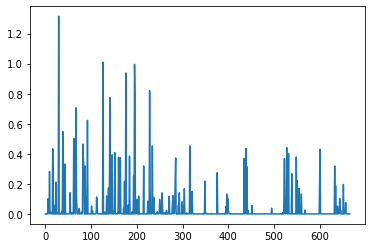

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
# Attack against Unprotected Model

In [ ]:
from adversary import attack, protect

In [ ]:
accuracies_logreg = []
examples_logreg = []

epsilons_logreg = [0, .05, .1, .15, .2, .25, .3]

In [ ]:
### Attack the model with different epsilons

In [ ]:
for eps in epsilons_logreg:
    acc, ex = attack(model_logreg, criterion, dataset_test, eps, device=device)
    accuracies_logreg.append(acc)
    examples_logreg.append(ex)

In [ ]:
### Plot Results of Attacks

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons_logreg, accuracies_logreg, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Protect Model against FGSM

In [ ]:
robust_net = Net().to(device)
protect_epochs = 10
protect_lr = 0.01
protect_bz = 16

In [ ]:
prot_train_loader, prot_test_loader = build_data_loaders(train_dataset, test_dataset, batch_size)

In [ ]:
protected_net = protect(robust_net, "Mini", CrossEntropyLoss(),         train_loader=prot_train_loader, test_loader=prot_test_loader, device=device, epochs=protect_epochs, learning_rate=protect_lr)

In [ ]:
# Attack against Protected Model

In [ ]:
accuracies_lenet_robust = []
examples_lenet_robust = []

epsilons_lenet_robust = [0, .05, .1, .15, .2, .25, .3]

In [ ]:
for eps in epsilons_lenet_robust:
    acc, ex = attack(protected_net, CrossEntropyLoss(), prot_train_loader, eps, device=device)
    accuracies_lenet_robust.append(acc)
    examples_lenet_robust.append(ex)

In [ ]:
# Comparing the models
plt.figure(figsize=(5,5))
plt.plot(epsilons_logreg, accuracies_logreg, "*-", c='red', label='Logistic regression')
plt.plot(epsilons_lenet, accuracies_lenet, "*-", c='blue', label='Convolutional network')
plt.plot(epsilons_lenet_robust, accuracies_lenet_robust, "*-", c='orange', label='Convolutional network (robust)')

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))

plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend();